In [1]:
!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Set naming conventions for the 20 different datasets
# wd: weekdays
# we: weekends

# ams: Amsterdam
# ath: Athens
# bcn: Barcelona
# ber: Berlin
# bud: Budapest
# lis: Lisbon
# lon: London
# par: Paris
# rom: Rome
# vie: Vienna

In [4]:
# Create df for weekdays in bcn
df_bcn_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/barcelona_weekdays.csv")

In [5]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_bcn_wd["day_type"] = "weekdays"

In [6]:
# Add the column "city" and fill all rows with bcn
df_bcn_wd["city"] = "Barcelona"

In [7]:
# Create df for weekends in bcn
df_bcn_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/barcelona_weekends.csv")

In [8]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_bcn_we["day_type"] = "weekends"

In [9]:
# Add the column "city" and fill all rows with bcn
df_bcn_we["city"] = "Barcelona"

In [10]:
# Concatenate dfs for weekdays and weekends within the city
df_bcn = pd.concat([df_bcn_wd, df_bcn_we], ignore_index=True)

In [11]:
# wd: weekdays
# ams: Amsterdam
df_ams_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/amsterdam_weekdays.csv")

In [12]:
df_ams_wd.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0              False      1    0                10.0   
1              4.0              False      0    0                 8.0   
2              2.0              False      0    1                 9.0   
3              4.0              False      0    1                 9.0   
4              2.0               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [13]:
print(df_ams_wd.isnull().sum())

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [14]:
df_ams_wd.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              2.0              False      1    0                10.0   
1              4.0              False      0    0                 8.0   
2              2.0              False      0    1                 9.0   
3              4.0              False      0    1                 9.0   
4              2.0               True      0    0                10.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                        93.0         1  5.022964    2.539380   78.690379   
1                        85.0         1  0.488389    0.239404  631.176378   
2                        87.0         1  5.748312    3.651621   75.275877   
3                        90.0         2  0.384862    0.439876  493.272534   
4                        98.0         1  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  
0         4.166708   98.253896         6.846473  4.90569  52.41772  
1        33.421209  837.280757        58.342928  4.90005  52.37432  
2         3.985908   95.386955         6.646700  4.97512  52.36103  
3        26.119108  875.033098        60.973565  4.89417  52.37663  
4        29.272733  815.305740        56.811677  4.90051  52.37508

In [15]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_ams_wd["day_type"] = "weekdays"

In [16]:
df_ams_wd.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

   bedrooms      dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0         1  5.022964    2.539380   78.690379         4.166708   98.253896   
1         1  0.488389    0.239404  631.176378        33.421209  837.280757   
2         1  5.748312    3.651621   75.275877         3.985908   95.386955   
3         2  0.384862    0.439876  493.272534        26.119108  875.033098   
4         1  0.544738    0.318693  552.830324        29.272733  815.305740   

   rest_index_norm      lng       lat  day_type  
0         6.846473  4.90569  52.41772  weekdays  
1        58.342928  4.90005  52.37432  weekdays  
2         6.646700  4.97512  52.36103  weekdays  
3        60.973565  4.89417  52.37663  weekdays  
4        56.811677  4.90051  52.37508  weekdays  

[5 rows x 21 columns]

In [17]:
# Add the column "city" and fill all rows with the value "Amsterdam"
df_ams_wd["city"] = "Amsterdam"

In [18]:
df_ams_wd.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380   78.690379         4.166708   98.253896   
1  0.488389    0.239404  631.176378        33.421209  837.280757   
2  5.748312    3.651621   75.275877         3.985908   95.386955   
3  0.384862    0.439876  493.272534        26.119108  875.033098   
4  0.544738    0.318693  552.830324        29.272733  815.305740   

   rest_index_norm      lng       lat  day_type       city  
0         6.846473  4.90569  52.41772  weekdays  Amsterdam  
1        58.342928  4.90005  52.37432  weekdays  Amsterdam  
2         6.646700  4.97512  52.36103  weekdays  Amsterdam  
3        60.973565  4.89417  52.37663  weekdays  Amsterdam  
4        56.811677  4.90051  52.37508  weekdays  Amsterdam  

[5 rows x 22 columns]

In [19]:
# df_ams_we
df_ams_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/amsterdam_weekends.csv")

In [20]:
print(df_ams_wd.isnull().sum())

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
day_type                      0
city                          0
dtype: int64


In [21]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_ams_we["day_type"] = "weekends"

In [22]:
# Add the column "city" and fill all rows with the value "Amsterdam"
df_ams_we["city"] = "Amsterdam"

In [23]:
df_ams_we.head(5)

Unnamed: 0      realSum        room_type  room_shared  room_private  \
0           0   319.640053     Private room        False          True   
1           1   347.995219     Private room        False          True   
2           2   482.975183     Private room        False          True   
3           3   485.552926     Private room        False          True   
4           4  2771.541724  Entire home/apt        False         False   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      0    1                 9.0  ...   
1              2.0              False      0    1                 9.0  ...   
2              4.0              False      0    1                 9.0  ...   
3              2.0               True      0    0                10.0  ...   
4              4.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  4.763360    0.852117  110.906123         5.871971  136.982208   
1  5.748310    3.651591   75.275937         3.985516   95.386468   
2  0.384872    0.439852  493.272517        26.116521  875.114817   
3  0.544723    0.318688  552.849514        29.270850  815.303994   
4  1.686798    1.458399  208.809162        11.055489  272.315202   

   rest_index_norm      lng       lat  day_type       city  
0        11.941560  4.84639  52.34137  weekends  Amsterdam  
1         8.315410  4.97512  52.36103  weekends  Amsterdam  
2        76.289005  4.89417  52.37663  weekends  Amsterdam  
3        71.074937  4.90051  52.37508  weekends  Amsterdam  
4        23.739349  4.88467  52.38749  weekends  Amsterdam  

[5 rows x 22 columns]

In [24]:
# Concatenate df_ams_wd & df_ams_we
df_ams = pd.concat([df_ams_wd, df_ams_we], ignore_index=True)

In [25]:
df_ams.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380   78.690379         4.166708   98.253896   
1  0.488389    0.239404  631.176378        33.421209  837.280757   
2  5.748312    3.651621   75.275877         3.985908   95.386955   
3  0.384862    0.439876  493.272534        26.119108  875.033098   
4  0.544738    0.318693  552.830324        29.272733  815.305740   

   rest_index_norm      lng       lat  day_type       city  
0         6.846473  4.90569  52.41772  weekdays  Amsterdam  
1        58.342928  4.90005  52.37432  weekdays  Amsterdam  
2         6.646700  4.97512  52.36103  weekdays  Amsterdam  
3        60.973565  4.89417  52.37663  weekdays  Amsterdam  
4        56.811677  4.90051  52.37508  weekdays  Amsterdam  

[5 rows x 22 columns]

In [26]:
df_ams.shape

(2080, 22)

In [27]:
# df_ath_wd
df_ath_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/athens_weekdays.csv")

In [28]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_ath_wd["day_type"] = "weekdays"

In [29]:
# Add the column "city" and fill all rows with the value "Athens"
df_ath_wd["city"] = "Athens"

In [30]:
# df_ath_we
df_ath_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/athens_weekends.csv")

In [31]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_ath_we["day_type"] = "weekends"

In [32]:
# Add the column "city" and fill all rows with the value "Athens"
df_ath_we["city"] = "Athens"

In [33]:
# Concatenate df_ath_wd & df_ath_we
df_ath = pd.concat([df_ath_wd, df_ath_we], ignore_index=True)

In [34]:
df_ath_wd.shape

(2653, 22)

In [35]:
df_ath_we.shape

(2627, 22)

In [36]:
df_ath.shape

(5280, 22)

In [37]:
df_ath.head(5)

Unnamed: 0     realSum        room_type  room_shared  room_private  \
0           0  129.824479  Entire home/apt        False         False   
1           1  138.963748  Entire home/apt        False         False   
2           2  156.304923  Entire home/apt        False         False   
3           3   91.627024  Entire home/apt        False         False   
4           4   74.051508     Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              4.0              False      0    0                10.0  ...   
1              4.0               True      1    0                10.0  ...   
2              3.0               True      0    1                10.0  ...   
3              4.0               True      1    0                10.0  ...   
4              2.0              False      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  2.813964    0.881890   55.348572         2.086871   78.778377   
1  0.407293    0.304568  240.306654         9.060559  407.167696   
2  1.237211    0.288488  199.507366         7.522257  395.967403   
3  4.367457    0.297467   39.803047         1.500740   58.706578   
4  2.194185    0.385266   78.733405         2.968577  113.325973   

   rest_index_norm       lng       lat  day_type    city  
0         5.915160  23.76600  37.98300  weekdays  Athens  
1        30.572629  23.73168  37.97776  weekdays  Athens  
2        29.731642  23.72200  37.97900  weekdays  Athens  
3         4.408047  23.72712  38.01435  weekdays  Athens  
4         8.509204  23.73391  37.99529  weekdays  Athens  

[5 rows x 22 columns]

In [38]:
print(df_ath.isnull().sum())

Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
day_type                      0
city                          0
dtype: int64


In [39]:
# Create df for weekdays in bcn
df_bcn_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/barcelona_weekdays.csv")

In [40]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_bcn_wd["day_type"] = "weekdays"

In [41]:
# Add the column "city" and fill all rows with bcn
df_bcn_wd["city"] = "Barcelona"

In [42]:
# Create df for weekends in bcn
df_bcn_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/barcelona_weekends.csv")

In [43]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_bcn_we["day_type"] = "weekends"

In [44]:
# Add the column "city" and fill all rows with bcn
df_bcn_we["city"] = "Barcelona"

In [45]:
# Concatenate dfs for weekdays and weekends within the city
df_bcn = pd.concat([df_bcn_wd, df_bcn_we], ignore_index=True)

In [46]:
# Create df for weekdays in ber
df_ber_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/berlin_weekdays.csv")

In [47]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_ber_wd["day_type"] = "weekdays"

In [48]:
# Add the column "city" and fill all rows with ber
df_ber_wd["city"] = "Berlin"

In [49]:
# Create df for weekends in bcn
df_ber_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/berlin_weekends.csv")

In [50]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_ber_we["day_type"] = "weekends"

In [51]:
# Add the column "city" and fill all rows with ber
df_ber_we["city"] = "Berlin"

In [52]:
# Concatenate dfs for weekdays and weekends within the city
df_ber = pd.concat([df_ber_wd, df_ber_we], ignore_index=True)

In [53]:
# Create df for weekdays in bud
df_bud_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/budapest_weekdays.csv")

In [54]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_bud_wd["day_type"] = "weekdays"

In [55]:
# Add the column "city" and fill all rows with bud
df_bud_wd["city"] = "Budapest"

In [56]:
# Create df for weekends in bud
df_bud_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/budapest_weekends.csv")

In [57]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_bud_we["day_type"] = "weekends"

In [58]:
# Add the column "city" and fill all rows with bud
df_bud_we["city"] = "Budapest"

In [59]:
# Concatenate dfs for weekdays and weekends within the city
df_bud = pd.concat([df_bud_wd, df_bud_we], ignore_index=True)

In [60]:
# Create df for weekdays in lis
df_lis_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/lisbon_weekdays.csv")

In [61]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_lis_wd["day_type"] = "weekdays"

In [62]:
# Add the column "city" and fill all rows with lis
df_lis_wd["city"] = "Lisbon"

In [63]:
# Create df for weekends in lis
df_lis_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/lisbon_weekends.csv")

In [64]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_lis_we["day_type"] = "weekends"

In [65]:
# Add the column "city" and fill all rows with lis
df_lis_we["city"] = "Lisbon"

In [66]:
# Concatenate dfs for weekdays and weekends within the city
df_lis = pd.concat([df_lis_wd, df_lis_we], ignore_index=True)

In [67]:
# Create df for weekdays in lon
df_lon_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/london_weekdays.csv")

In [68]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_lon_wd["day_type"] = "weekdays"

In [69]:
# Add the column "city" and fill all rows with lon
df_lon_wd["city"] = "London"

In [70]:
# Create df for weekends in lon
df_lon_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/london_weekends.csv")

In [71]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_lon_we["day_type"] = "weekends"

In [72]:
# Add the column "city" and fill all rows with lon
df_lon_we["city"] = "London"

In [73]:
# Concatenate dfs for weekdays and weekends within the city
df_lon = pd.concat([df_lon_wd, df_lon_we], ignore_index=True)

In [74]:
# Create df for weekdays in par
df_par_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/paris_weekdays.csv")

In [75]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_par_wd["day_type"] = "weekdays"

In [76]:
# Add the column "city" and fill all rows with par
df_par_wd["city"] = "Paris"

In [77]:
# Create df for weekends in par
df_par_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/paris_weekends.csv")

In [78]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_par_we["day_type"] = "weekends"

In [79]:
# Add the column "city" and fill all rows with par
df_par_we["city"] = "Paris"

In [80]:
# Concatenate dfs for weekdays and weekends within the city
df_par = pd.concat([df_par_wd, df_par_we], ignore_index=True)

In [81]:
# Create df for weekdays in rom
df_rom_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/rome_weekdays.csv")

In [82]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_rom_wd["day_type"] = "weekdays"

In [83]:
# Add the column "city" and fill all rows with rom
df_rom_wd["city"] = "Rome"

In [84]:
# Create df for weekends in rom
df_rom_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/rome_weekends.csv")

In [85]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_rom_we["day_type"] = "weekends"

In [86]:
# Add the column "city" and fill all rows with rom
df_rom_we["city"] = "Rome"

In [87]:
# Concatenate dfs for weekdays and weekends within the city
df_rom = pd.concat([df_rom_wd, df_rom_we], ignore_index=True)

In [88]:
# Create df for weekdays in vie
df_vie_wd = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/vienna_weekdays.csv")

In [89]:
# Add the column "day_type" and fill all rows with the value "weekdays"
df_vie_wd["day_type"] = "weekdays"

In [90]:
# Add the column "city" and fill all rows with vie
df_vie_wd["city"] = "Vienna"

In [91]:
# Create df for weekends in vie
df_vie_we = pd.read_csv("https://raw.githubusercontent.com/aicanizares/Airbnb-Prices-in-European-Cities/refs/heads/main/source_datasets/vienna_weekends.csv")

In [92]:
# Add the column "day_type" and fill all rows with the value "weekends"
df_vie_we["day_type"] = "weekends"

In [93]:
# Add the column "city" and fill all rows with vie
df_vie_we["city"] = "Vienna"

In [94]:
# Concatenate dfs for weekdays and weekends within the city
df_vie = pd.concat([df_vie_wd, df_vie_we], ignore_index=True)

In [95]:
df_combined = pd.concat([df_ams, df_ath, df_bcn, df_ber, df_bud, df_lis, df_lon, df_par, df_rom, df_vie], ignore_index=True)

In [96]:
df_combined.head(5)

Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0              2.0              False      1    0                10.0  ...   
1              4.0              False      0    0                 8.0  ...   
2              2.0              False      0    1                 9.0  ...   
3              4.0              False      0    1                 9.0  ...   
4              2.0               True      0    0                10.0  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380   78.690379         4.166708   98.253896   
1  0.488389    0.239404  631.176378        33.421209  837.280757   
2  5.748312    3.651621   75.275877         3.985908   95.386955   
3  0.384862    0.439876  493.272534        26.119108  875.033098   
4  0.544738    0.318693  552.830324        29.272733  815.305740   

   rest_index_norm      lng       lat  day_type       city  
0         6.846473  4.90569  52.41772  weekdays  Amsterdam  
1        58.342928  4.90005  52.37432  weekdays  Amsterdam  
2         6.646700  4.97512  52.36103  weekdays  Amsterdam  
3        60.973565  4.89417  52.37663  weekdays  Amsterdam  
4        56.811677  4.90051  52.37508  weekdays  Amsterdam  

[5 rows x 22 columns]

In [97]:
# Drop "unnamed" column
df_combined = df_combined.drop(columns=['Unnamed: 0'])

In [98]:
df_combined.head(5)

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room        False          True              2.0   
1  344.245776  Private room        False          True              4.0   
2  264.101422  Private room        False          True              2.0   
3  433.529398  Private room        False          True              4.0   
4  485.552926  Private room        False          True              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      1    0                10.0   
1              False      0    0                 8.0   
2              False      0    1                 9.0   
3              False      0    1                 9.0   
4               True      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  day_type  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432  weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103  weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663  weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508  weekdays   

        city  
0  Amsterdam  
1  Amsterdam  
2  Amsterdam  
3  Amsterdam  
4  Amsterdam  

[5 rows x 21 columns]

In [99]:
df_combined.to_excel("airbnb_prices.xlsx", index=False)

In [100]:
duplicates = df_combined[df_combined.duplicated()]

In [101]:
duplicates

Empty DataFrame
Columns: [realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, day_type, city]
Index: []

[0 rows x 21 columns]

In [102]:
df_combined.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'day_type', 'city'],
      dtype='object')

In [103]:
df_combined["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [104]:
df_combined["room_shared"].unique()

array([False,  True])

In [105]:
df_combined["room_private"].unique()

array([ True, False])

In [106]:
df_combined["person_capacity"].unique()

array([2., 4., 3., 6., 5.])

In [107]:
df_combined["host_is_superhost"].unique()

array([False,  True])

In [108]:
df_combined["multi"].unique()

array([1, 0], dtype=int64)

In [109]:
df_combined["biz"].unique()

array([0, 1], dtype=int64)

In [110]:
df_combined["cleanliness_rating"].unique()

array([10.,  8.,  9.,  6.,  7.,  5.,  4.,  2.,  3.])

In [111]:
df_combined["guest_satisfaction_overall"].unique()

array([ 93.,  85.,  87.,  90.,  98., 100.,  94.,  96.,  88.,  97.,  95.,
        89.,  91.,  84.,  77.,  99.,  80.,  92.,  82.,  78.,  86.,  74.,
        81.,  83.,  73.,  76.,  75.,  70.,  65.,  47.,  60.,  20.,  40.,
        72.,  79.,  68.,  57.,  56.,  67.,  50.,  53.,  63.,  71.,  66.,
        64.,  69.,  62.,  30.,  44.,  46.,  55.,  61.,  54.])

In [112]:
df_combined["bedrooms"].unique()

array([ 1,  2,  3,  0,  5,  4,  6,  9, 10,  8], dtype=int64)

In [113]:
df_combined["dist"].unique()

array([5.0229638 , 0.48838929, 5.74831192, ..., 0.99405133, 3.04409973,
       1.26393173])

In [114]:
df_combined["metro_dist"].unique()

array([2.53938   , 0.23940392, 3.65162129, ..., 0.20253882, 0.28743468,
       0.48090251])

In [115]:
df_combined["attr_index"].unique()

array([ 78.69037927, 631.17637825,  75.27587691, ..., 169.07340182,
       109.23657393, 150.45038145])

In [116]:
df_combined["rest_index"].unique()

array([ 98.25389587, 837.28075674,  95.38695493, ..., 282.29642446,
       158.56339833, 225.24729289])

In [117]:
df_combined["attr_index_norm"].unique()

array([ 4.16670787, 33.42120862,  3.9859077 , ..., 12.10792146,
        7.82280266, 10.77426362])

In [118]:
df_combined["rest_index_norm"].unique()

array([ 6.84647282, 58.34292774,  6.64670025, ...,  6.82299566,
        3.83241616,  5.44414016])

In [119]:
df_combined["lng"].unique()

array([ 4.90569,  4.90005,  4.97512, ..., 16.38047, 16.37953, 16.3794 ])

In [120]:
df_combined["lat"].unique()

array([52.41772, 52.37432, 52.36103, ..., 48.21086, 48.21001, 48.21136])

In [121]:
df_combined["day_type"].unique()

array(['weekdays', 'weekends'], dtype=object)

In [122]:
df_combined["city"].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'London', 'Paris', 'Rome', 'Vienna'], dtype=object)

In [123]:
# Check data types of all columns
print(df_combined.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
day_type                       object
city                           object
dtype: object


In [124]:
# Convert boolean columns to integers
df_combined = df_combined.replace({True: 1, False: 0})

C:\Users\aican\AppData\Local\Temp\ipykernel_35556\233979133.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined = df_combined.replace({True: 1, False: 0})


In [125]:
# Summary for numerical variables
df_combined.describe()

realSum   room_shared  room_private  person_capacity  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean     279.879591      0.007078      0.361518         3.161661   
std      327.948386      0.083835      0.480445         1.298545   
min       34.779339      0.000000      0.000000         2.000000   
25%      148.752174      0.000000      0.000000         2.000000   
50%      211.343089      0.000000      0.000000         3.000000   
75%      319.694287      0.000000      1.000000         4.000000   
max    18545.450285      1.000000      1.000000         6.000000   

       host_is_superhost         multi           biz  cleanliness_rating  \
count       51707.000000  51707.000000  51707.000000        51707.000000   
mean            0.255903      0.291353      0.350204            9.390624   
std             0.436372      0.454390      0.477038            0.954868   
min             0.000000      0.000000      0.000000            2.000000   
25%             0.000000      0.000000      0.000000            9.000000   
50%             0.000000      0.000000      0.000000           10.000000   
75%             1.000000      1.000000      1.000000           10.000000   
max             1.000000      1.000000      1.000000           10.000000   

       guest_satisfaction_overall     bedrooms          dist    metro_dist  \
count                51707.000000  51707.00000  51707.000000  51707.000000   
mean                    92.628232      1.15876      3.191285      0.681540   
std                      8.945531      0.62741      2.393803      0.858023   
min                     20.000000      0.00000      0.015045      0.002301   
25%                     90.000000      1.00000      1.453142      0.248480   
50%                     95.000000      1.00000      2.613538      0.413269   
75%                     99.000000      1.00000      4.263077      0.737840   
max                    100.000000     10.00000     25.284557     14.273577   

         attr_index  attr_index_norm    rest_index  rest_index_norm  \
count  51707.000000     51707.000000  51707.000000     51707.000000   
mean     294.204105        13.423792    626.856696        22.786177   
std      224.754123         9.807985    497.920226        17.804096   
min       15.152201         0.926301     19.576924         0.592757   
25%      136.797385         6.380926    250.854114         8.751480   
50%      234.331748        11.468305    522.052783        17.542238   
75%      385.756381        17.415082    832.628988        32.964603   
max     4513.563486       100.000000   6696.156772       100.000000   

                lng           lat  
count  51707.000000  51707.000000  
mean       7.426068     45.671128  
std        9.799725      5.249263  
min       -9.226340     37.953000  
25%       -0.072500     41.399510  
50%        4.873000     47.506690  
75%       13.518825     51.471885  
max       23.786020     52.641410

In [126]:
# Summary for categorical (object) variables 
df_combined.describe(include=["O"])

room_type  day_type    city
count             51707     51707   51707
unique                3         2      10
top     Entire home/apt  weekends  London
freq              32648     26207    9993

In [127]:
# Summary for categorical variable 'category'
df_combined['realSum'].value_counts()

realSum
184.462161     188
161.550511     167
126.715451     162
115.998406     145
138.963748     133
              ... 
189.562313       1
127.002046       1
1526.846821      1
2190.079729      1
301.054157       1
Name: count, Length: 10497, dtype: int64

In [128]:
# Summary for categorical variables
for column in df_combined.describe(include=["O"]).columns:
    print(df_combined[column].value_counts())
    print()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64

day_type
weekends    26207
weekdays    25500
Name: count, dtype: int64

city
London       9993
Rome         9027
Paris        6688
Lisbon       5763
Athens       5280
Budapest     4022
Vienna       3537
Barcelona    2833
Berlin       2484
Amsterdam    2080
Name: count, dtype: int64



In [129]:
# Do we have imbalanced data? Until what percentage does it start being imbalanced?
# Room Type: "Entire home/apt" is dominant (~63%), but not extreme.
# Day Type: Almost equal distribution (weekends vs. weekdays).
# City: London and Rome have the highest listings, while Amsterdam has much fewer.
# NOT DONE

<Axes: xlabel='realSum', ylabel='Count'>

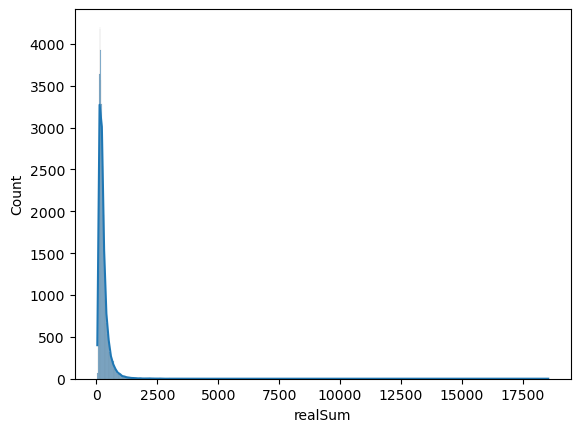

In [130]:
# For continuous variables: Histogram
sns.histplot(df_combined['realSum'], bins=1000, kde=True)

In [131]:
# Conclusion:
# We do not see a bell-shaped curve (a sign for normal distribution).

<Axes: xlabel='room_type', ylabel='count'>

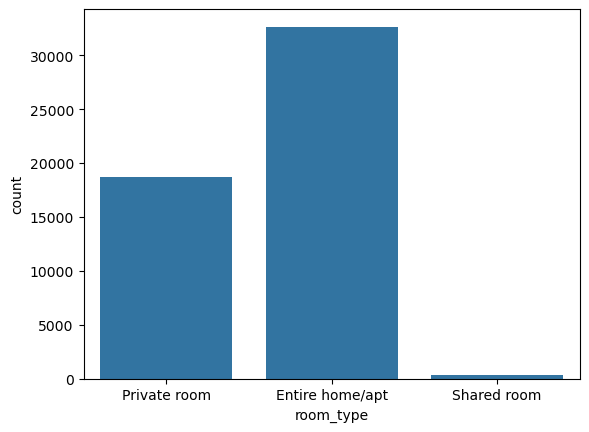

In [132]:
# Bar chart
sns.countplot(x='room_type', data=df_combined)

<Axes: xlabel='city', ylabel='count'>

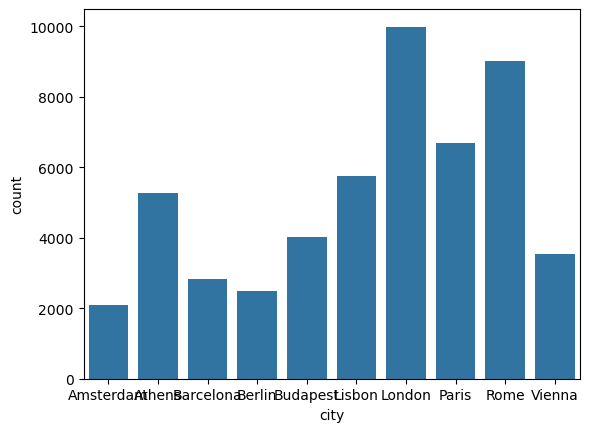

In [133]:
# Bar chart
sns.countplot(x='city', data=df_combined)

<Axes: xlabel='cleanliness_rating', ylabel='realSum'>

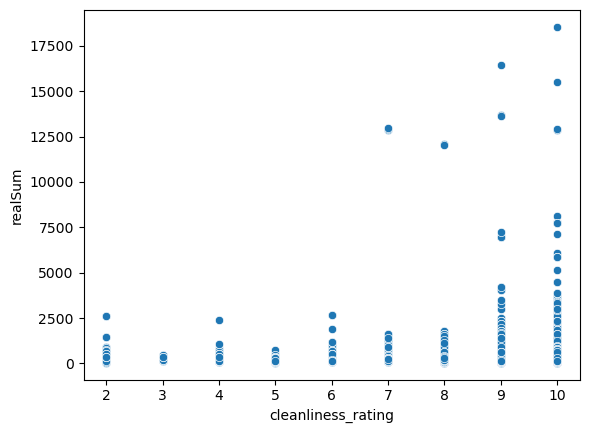

In [134]:
# Scatterplot for numerical variables
sns.scatterplot(x = "cleanliness_rating", y = "realSum", data = df_combined)

<Axes: xlabel='realSum', ylabel='dist'>

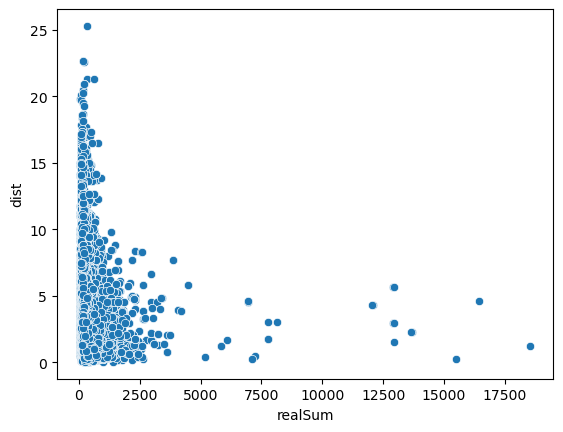

In [135]:
# Scatterplot for numerical variables
sns.scatterplot(x = "realSum", y = "dist", data = df_combined)

<Axes: xlabel='realSum', ylabel='metro_dist'>

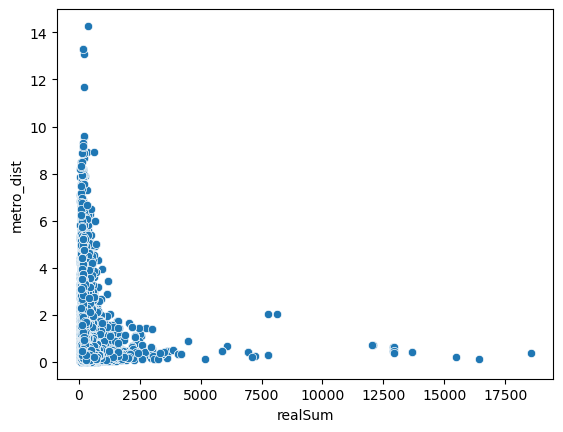

In [136]:
# Scatterplot for numerical variables
sns.scatterplot(x = "realSum", y = "metro_dist", data = df_combined)

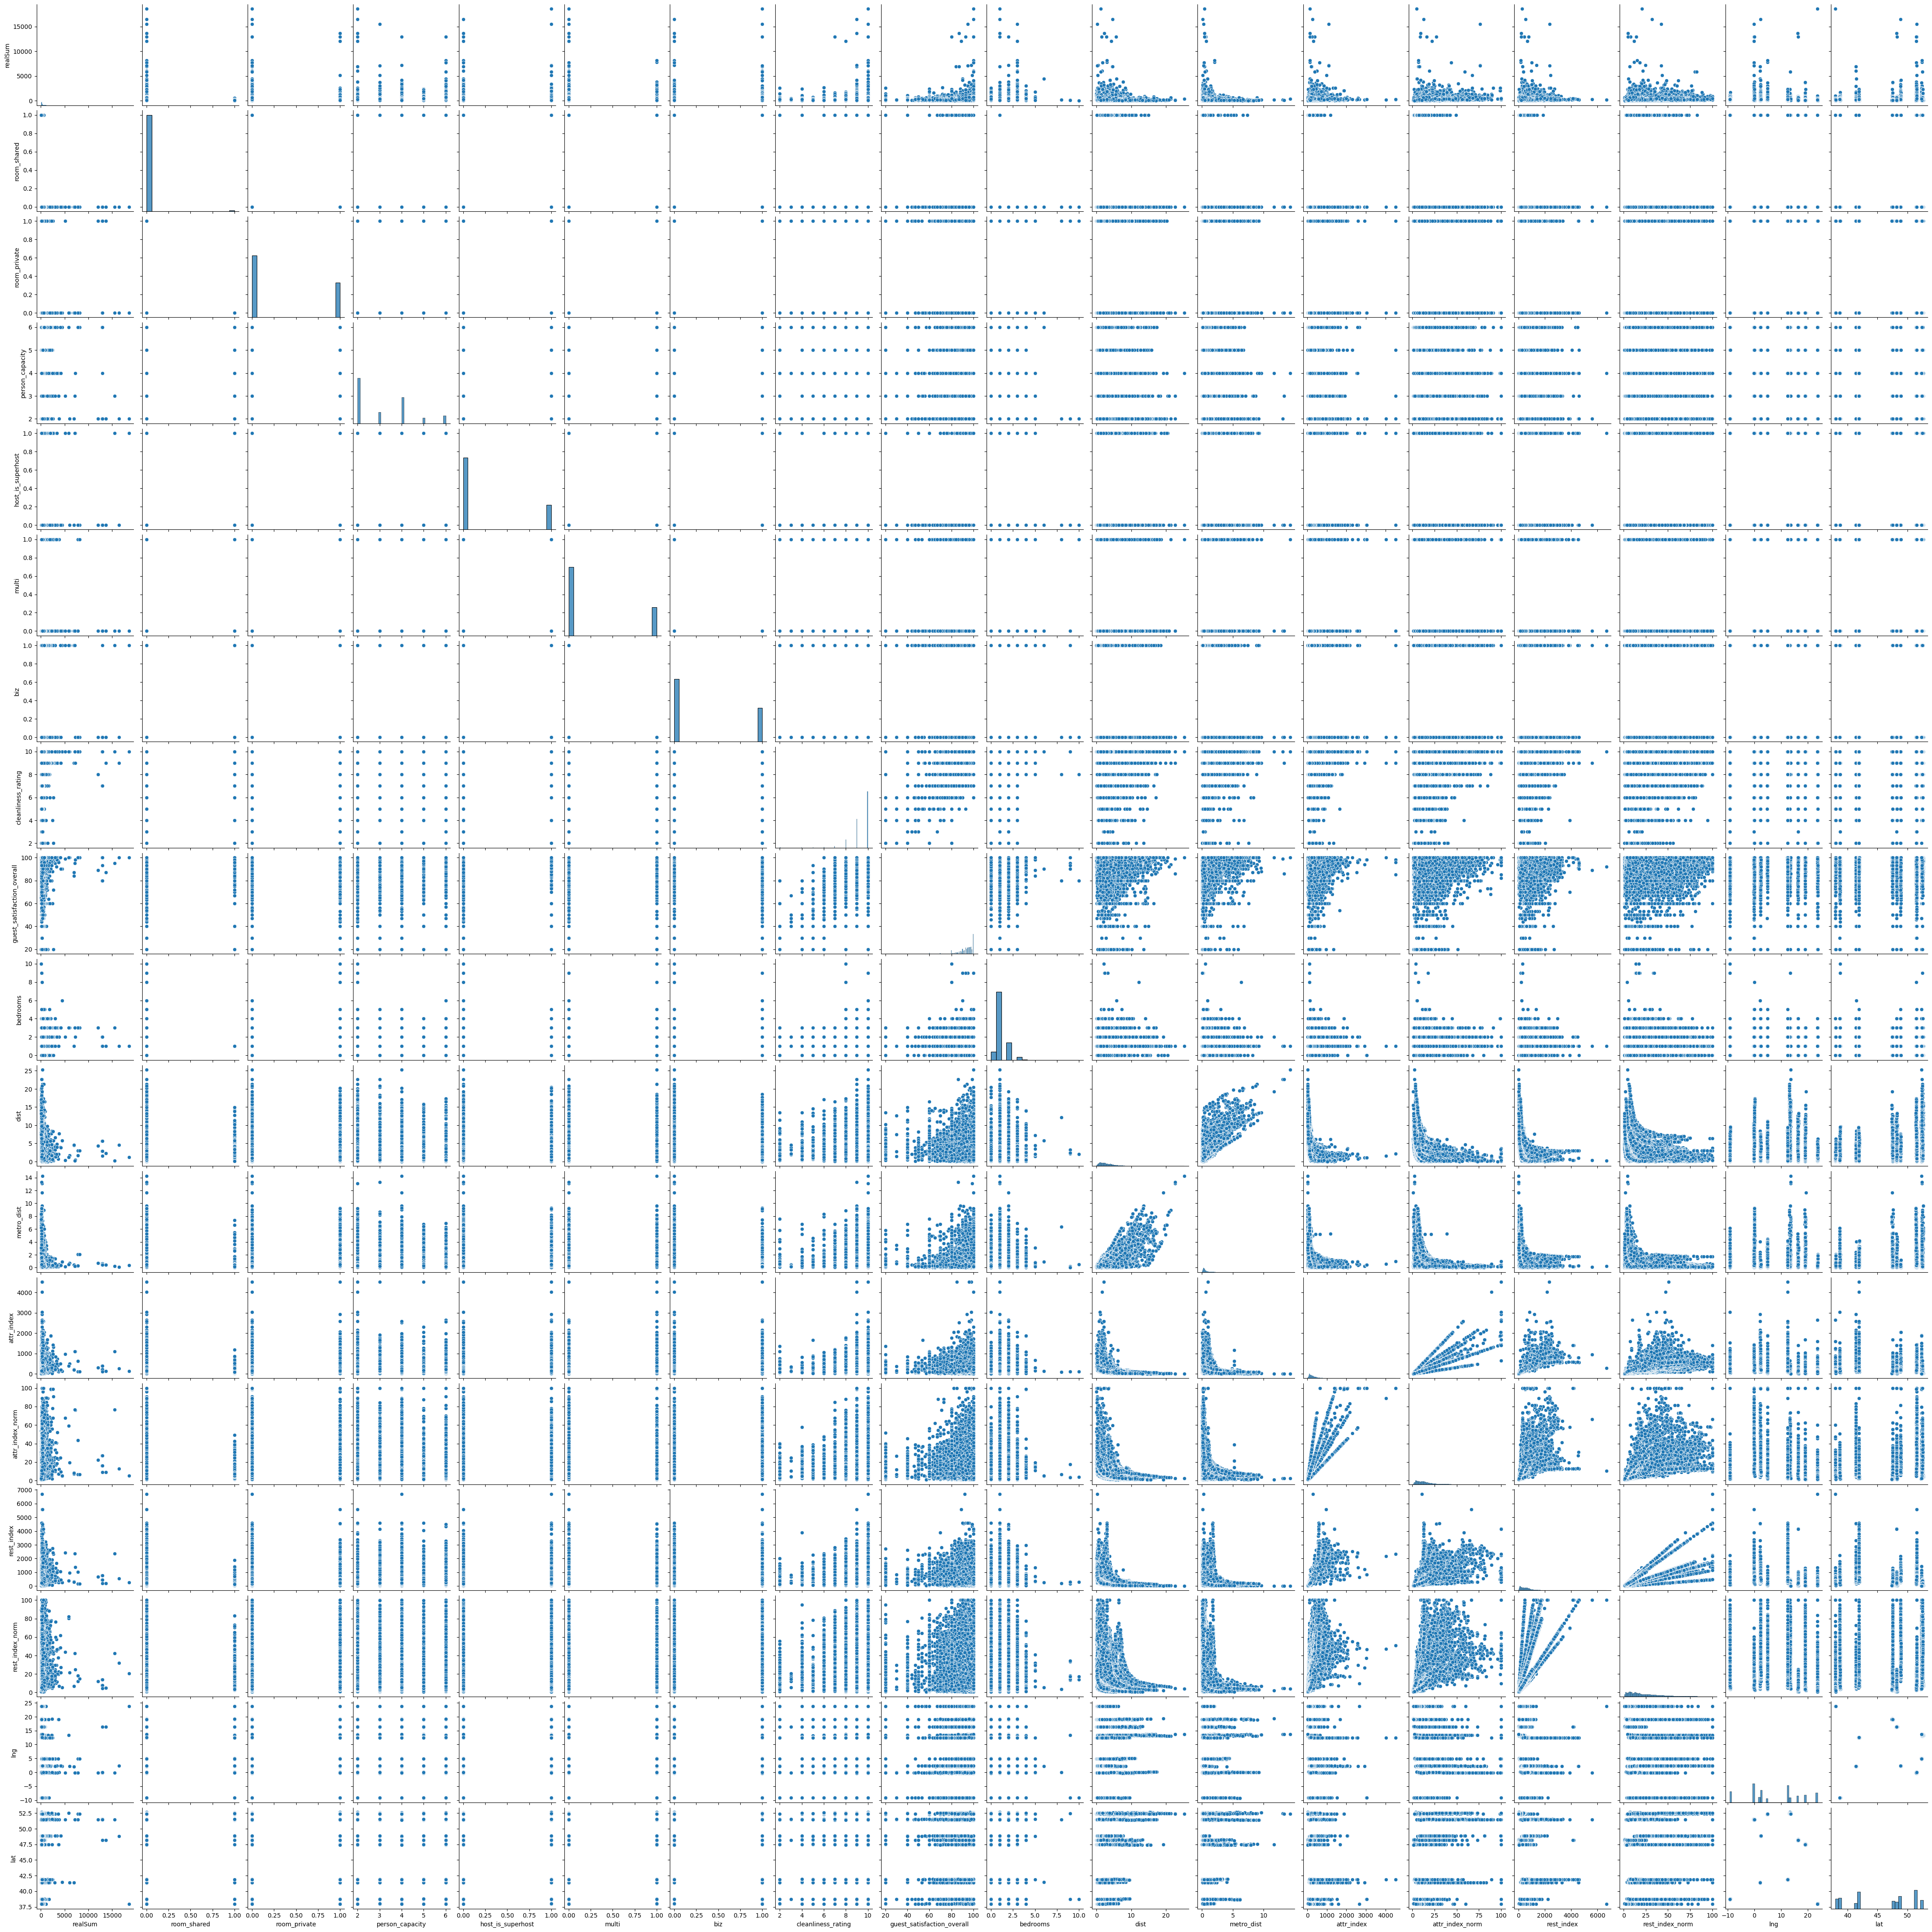

In [137]:
# Generate scatterplots for all numerical columns
sns.pairplot(df_combined)

plt.show()

In [138]:
# Select only numeric columns
numeric_cols = df_combined.select_dtypes(include=['number'])

In [139]:
numeric_cols

realSum  room_shared  room_private  person_capacity  \
0      194.033698            0             1              2.0   
1      344.245776            0             1              4.0   
2      264.101422            0             1              2.0   
3      433.529398            0             1              4.0   
4      485.552926            0             1              2.0   
...           ...          ...           ...              ...   
51702  715.938574            0             0              6.0   
51703  304.793960            0             0              2.0   
51704  637.168969            0             0              2.0   
51705  301.054157            0             1              2.0   
51706  133.230489            0             1              4.0   

       host_is_superhost  multi  biz  cleanliness_rating  \
0                      0      1    0                10.0   
1                      0      0    0                 8.0   
2                      0      0    1                 9.0   
3                      0      0    1                 9.0   
4                      1      0    0                10.0   
...                  ...    ...  ...                 ...   
51702                  0      0    1                10.0   
51703                  0      0    0                 8.0   
51704                  0      0    0                10.0   
51705                  0      0    0                10.0   
51706                  1      1    0                10.0   

       guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                            93.0         1  5.022964    2.539380   78.690379   
1                            85.0         1  0.488389    0.239404  631.176378   
2                            87.0         1  5.748312    3.651621   75.275877   
3                            90.0         2  0.384862    0.439876  493.272534   
4                            98.0         1  0.544738    0.318693  552.830324   
...                           ...       ...       ...         ...         ...   
51702                       100.0         3  0.530181    0.135447  219.402478   
51703                        86.0         1  0.810205    0.100839  204.970121   
51704                        93.0         1  0.994051    0.202539  169.073402   
51705                        87.0         1  3.044100    0.287435  109.236574   
51706                        93.0         1  1.263932    0.480903  150.450381   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  
0             4.166708   98.253896         6.846473   4.90569  52.41772  
1            33.421209  837.280757        58.342928   4.90005  52.37432  
2             3.985908   95.386955         6.646700   4.97512  52.36103  
3            26.119108  875.033098        60.973565   4.89417  52.37663  
4            29.272733  815.305740        56.811677   4.90051  52.37508  
...                ...         ...              ...       ...       ...  
51702        15.712158  438.756874        10.604584  16.37940  48.21136  
51703        14.678608  342.182813         8.270427  16.38070  48.20296  
51704        12.107921  282.296424         6.822996  16.38568  48.20460  
51705         7.822803  158.563398         3.832416  16.34100  48.19200  
51706        10.774264  225.247293         5.444140  16.39066  48.20811  

[51707 rows x 18 columns]

In [140]:
# Calculate correlation matrix
corr_matrix = numeric_cols.corr()

In [141]:
corr_matrix

realSum  room_shared  room_private  \
realSum                     1.000000    -0.035095     -0.171949   
room_shared                -0.035095     1.000000     -0.063533   
room_private               -0.171949    -0.063533      1.000000   
person_capacity             0.203077     0.035146     -0.499993   
host_is_superhost          -0.045478    -0.027839     -0.049501   
multi                      -0.052926    -0.016061      0.137026   
biz                         0.037144     0.044406     -0.040198   
cleanliness_rating         -0.006082    -0.040097     -0.030983   
guest_satisfaction_overall -0.001888    -0.027876     -0.033401   
bedrooms                    0.221653    -0.021365     -0.155889   
dist                       -0.044725     0.014144      0.213351   
metro_dist                 -0.061025    -0.002868      0.101981   
attr_index                  0.178228    -0.031458     -0.022286   
attr_index_norm             0.292396    -0.006137      0.029140   
rest_index                  0.134722    -0.031297     -0.022343   
rest_index_norm             0.144094     0.005711     -0.136846   
lng                        -0.173833    -0.027829     -0.201709   
lat                         0.211805     0.023304      0.140762   

                            person_capacity  host_is_superhost     multi  \
realSum                            0.203077          -0.045478 -0.052926   
room_shared                        0.035146          -0.027839 -0.016061   
room_private                      -0.499993          -0.049501  0.137026   
person_capacity                    1.000000           0.031431 -0.054326   
host_is_superhost                  0.031431           1.000000  0.097520   
multi                             -0.054326           0.097520  1.000000   
biz                                0.110668          -0.108506 -0.470725   
cleanliness_rating                 0.003256           0.272376  0.041064   
guest_satisfaction_overall         0.005181           0.280062  0.054254   
bedrooms                           0.560627           0.024250 -0.000659   
dist                              -0.128488          -0.056113  0.033426   
metro_dist                        -0.037267          -0.000722  0.043365   
attr_index                         0.028394          -0.026335  0.006319   
attr_index_norm                   -0.050487          -0.088949 -0.041412   
rest_index                         0.037330          -0.035060  0.007051   
rest_index_norm                    0.038059          -0.018348 -0.037402   
lng                                0.146848           0.185748  0.041260   
lat                               -0.168265          -0.113811 -0.034058   

                                 biz  cleanliness_rating  \
realSum                     0.037144           -0.006082   
room_shared                 0.044406           -0.040097   
room_private               -0.040198           -0.030983   
person_capacity             0.110668            0.003256   
host_is_superhost          -0.108506            0.272376   
multi                      -0.470725            0.041064   
biz                         1.000000           -0.107310   
cleanliness_rating         -0.107310            1.000000   
guest_satisfaction_overall -0.208160            0.714045   
bedrooms                   -0.026741            0.033489   
dist                       -0.164767           -0.030202   
metro_dist                 -0.109153            0.010441   
attr_index                  0.114732           -0.025322   
attr_index_norm             0.093720           -0.075372   
rest_index                  0.137747           -0.031929   
rest_index_norm             0.083999           -0.005995   
lng                        -0.088943            0.120379   
lat                        -0.126433           -0.092502   

                            guest_satisfaction_overall  bedrooms      dist  \
realSum                                      -0.001888  0.221653 -0.044725   
room_shared  

<Axes: >

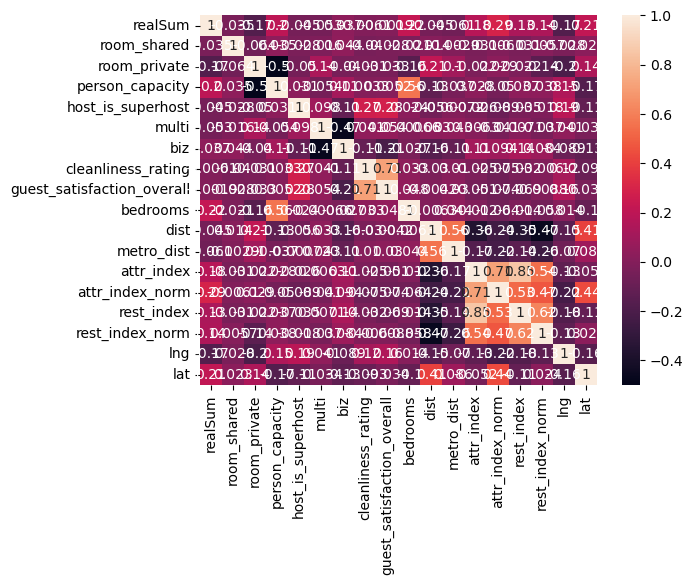

In [142]:
# Plot a heatmap for numerical variables
sns.heatmap(corr_matrix, annot=True)

In [143]:
import numpy as np

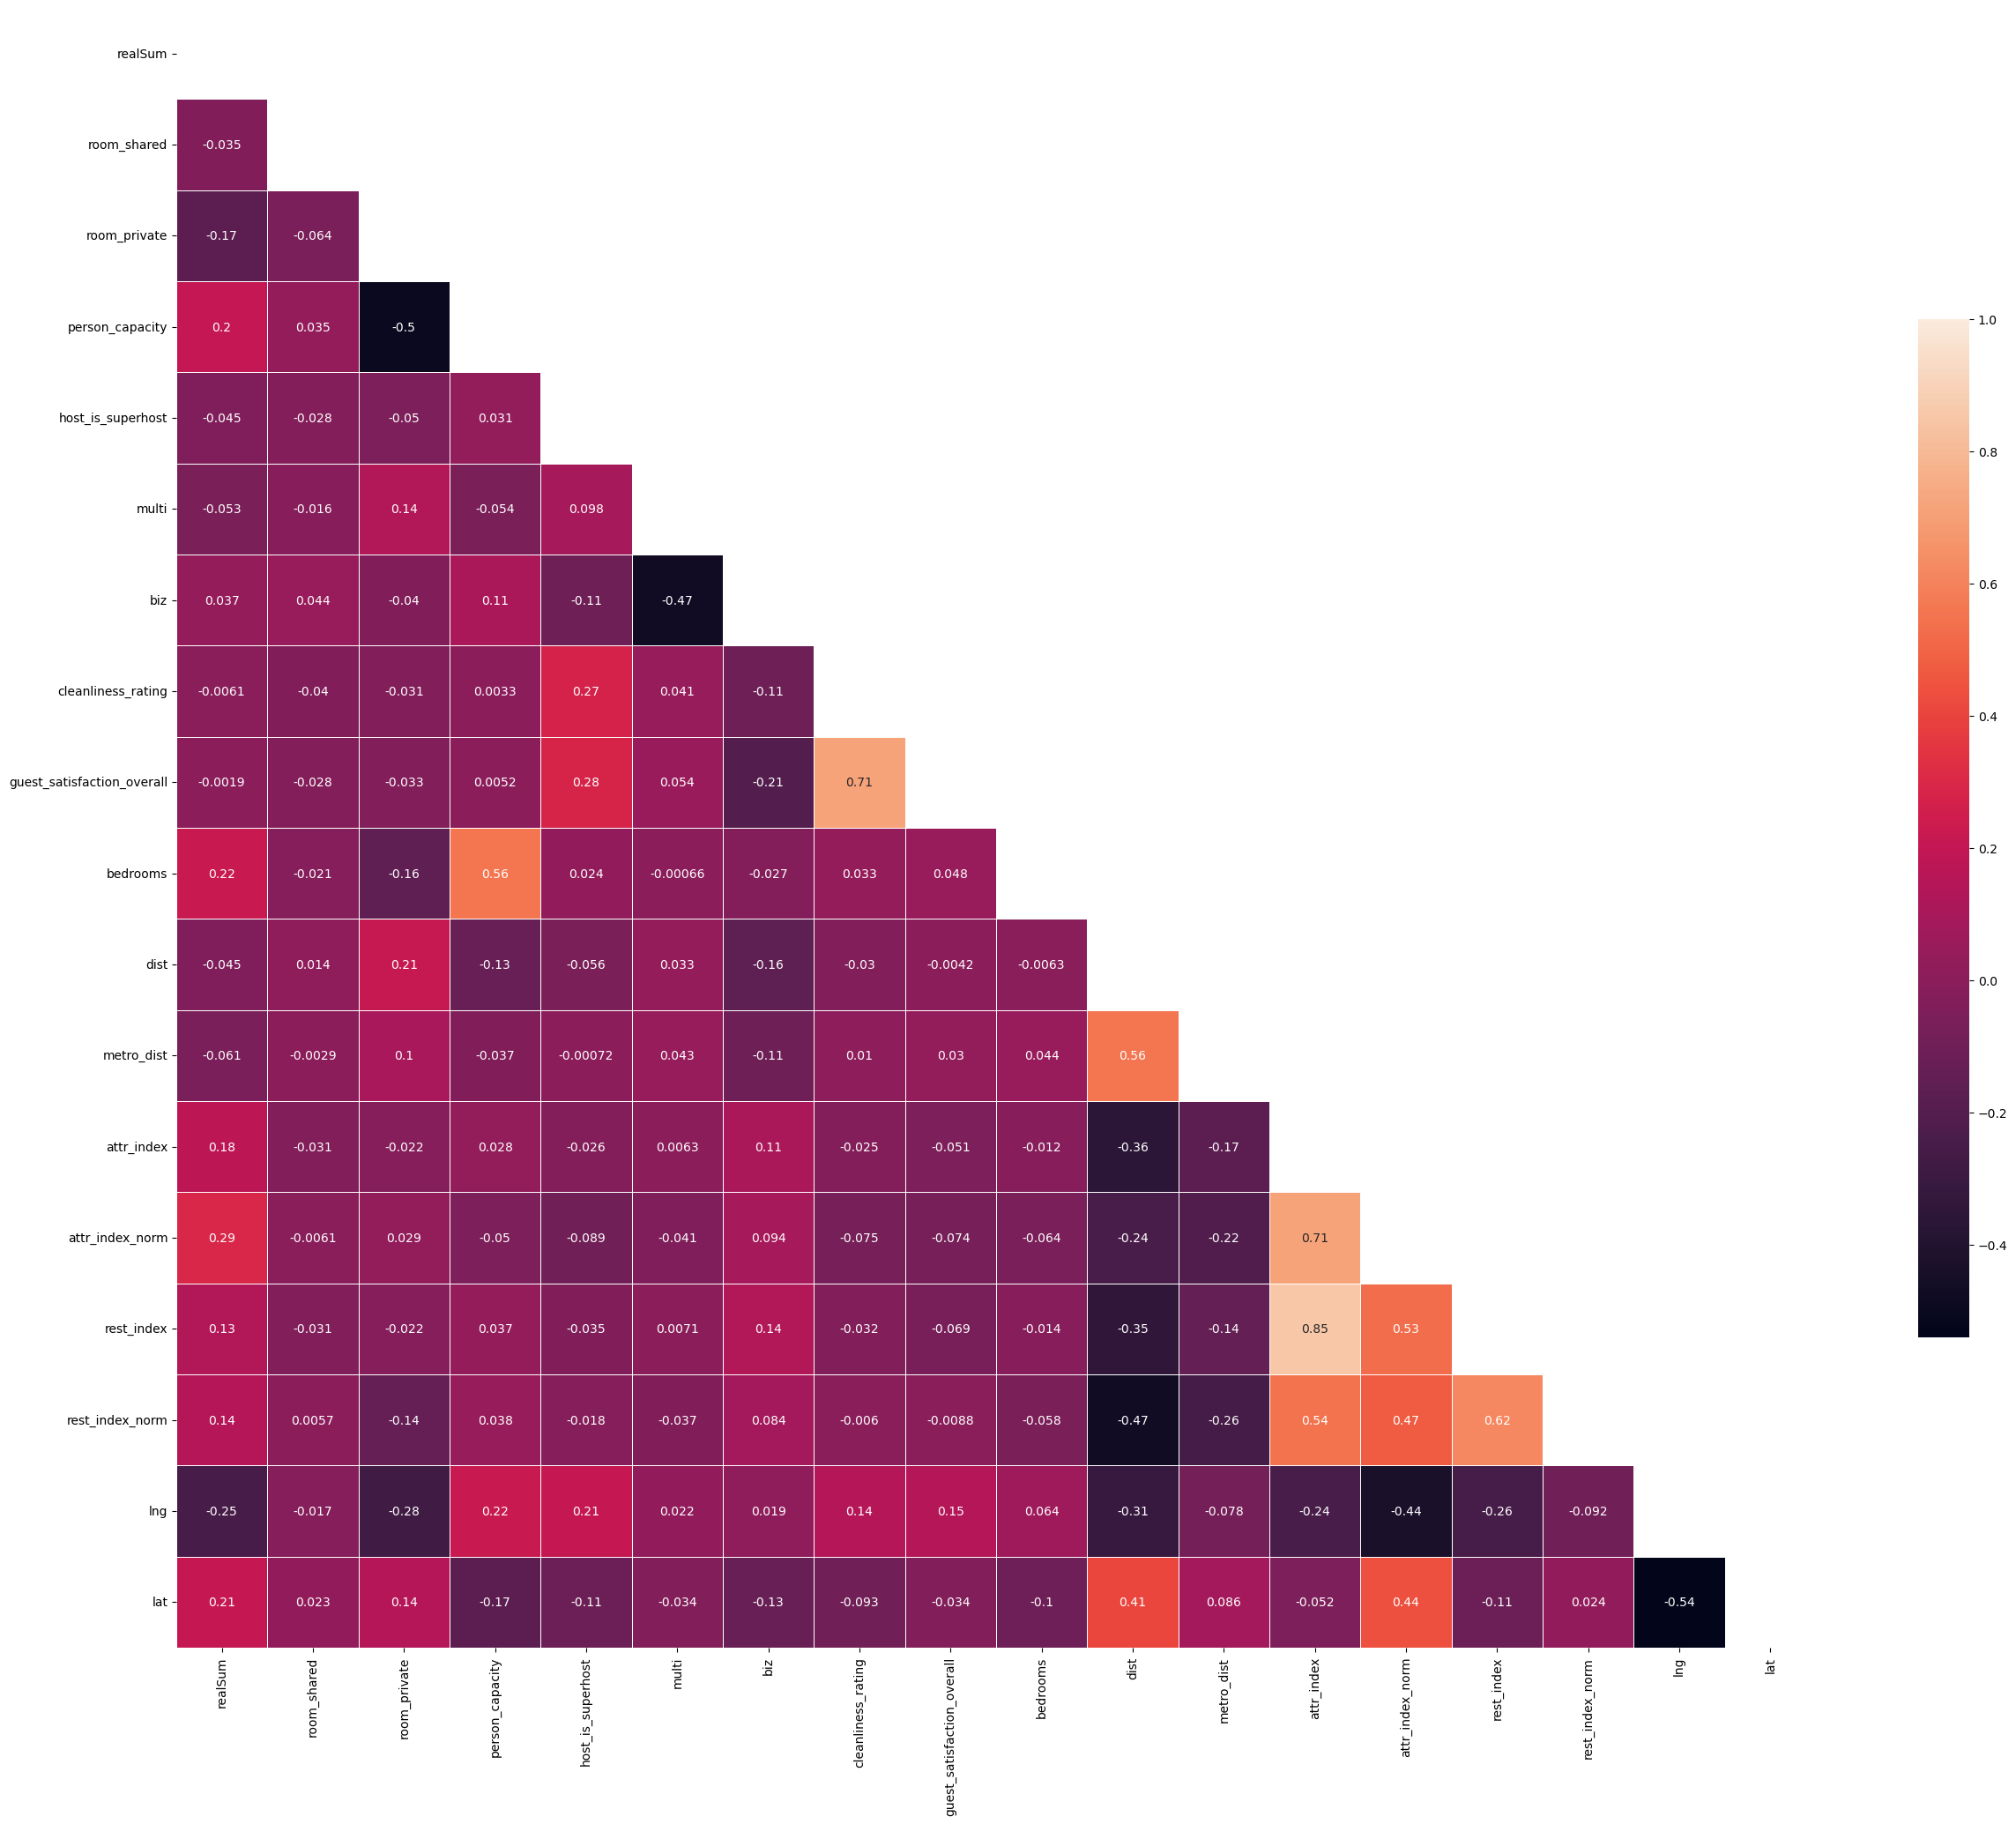

In [144]:
corr=np.abs(numeric_cols).corr()

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [145]:
# Compute absolute correlations
corr_values = numeric_cols.corr()['realSum'].abs().sort_values(ascending=False)

# Print correlation values
print(corr_values)

realSum                       1.000000
attr_index_norm               0.292396
bedrooms                      0.221653
lat                           0.211805
person_capacity               0.203077
attr_index                    0.178228
lng                           0.173833
room_private                  0.171949
rest_index_norm               0.144094
rest_index                    0.134722
metro_dist                    0.061025
multi                         0.052926
host_is_superhost             0.045478
dist                          0.044725
biz                           0.037144
room_shared                   0.035095
cleanliness_rating            0.006082
guest_satisfaction_overall    0.001888
Name: realSum, dtype: float64


In [146]:
numeric_cols.columns

Index(['realSum', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating',
       'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist',
       'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng',
       'lat'],
      dtype='object')

In [147]:
# Conclusions
# The columns "dist" and "attr_index_norm" show the highest correlation to the target variable ("realSum").
# This means that a central location in the city centre and the attraction index are key to the listing price.
# We interpret attr_index_norm as the percentage in which the product page is visited or interacted with in relation to other property listings.
# This in turn might be due to external factors such as property images.
# The column at the bottom is lat, not realSUM!!!!!!!!!!! I thought it was realSum to draw the conclusions above.
# Since we  put realSum in the code, are these the correlations to realsum, although realsum does not appear on the heatmap?????????
# NOT DONE


# New insights: none of the columns correlate to the target variable higher than 5 % (remember to do this again with no outliers). The maximum correlation is in attr_index_norm, with 29 %.

<Axes: xlabel='city', ylabel='realSum'>

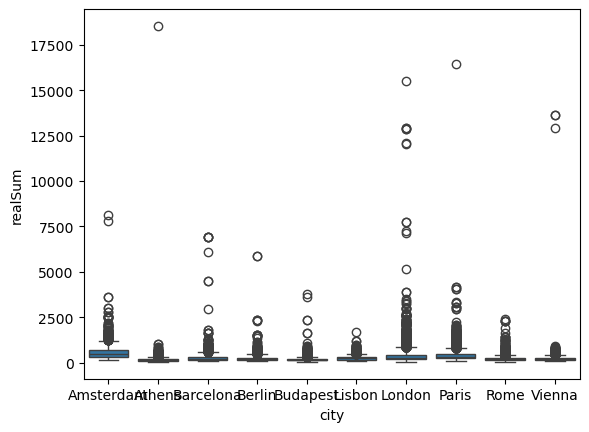

In [148]:
# Box plot for numerical and categorical variable
sns.boxplot(x='city', y='realSum', data=df_combined)

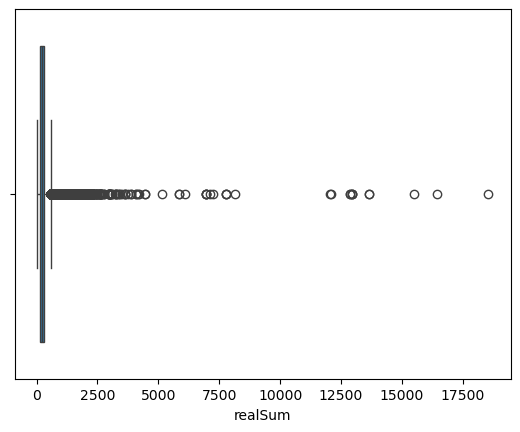

In [149]:
# Boxplot for 1 numerical variable
sns.boxplot(x=df_combined['realSum'])
plt.show()

In [150]:
# Conclusions:
# The box from the boxplot is not symmetrical (a sign of normality in the distribution).

<Axes: xlabel='day_type', ylabel='realSum'>

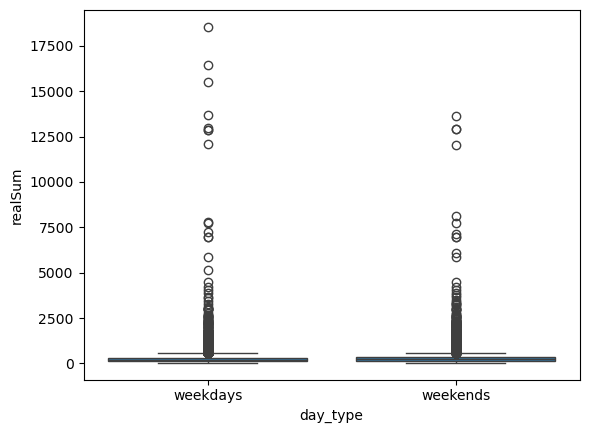

In [151]:
# Box plot for numerical and categorical variable
sns.boxplot(x='day_type', y='realSum', data=df_combined)

<Axes: xlabel='room_type', ylabel='realSum'>

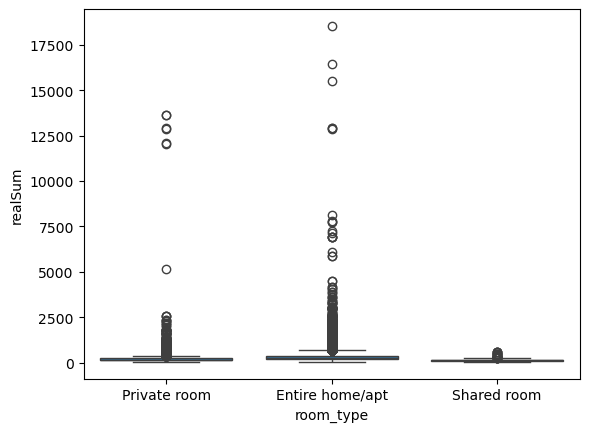

In [152]:
# Box plot for numerical and categorical variable
sns.boxplot(x='room_type', y='realSum', data=df_combined)

In [153]:
# As we see in the boxplots, there are a lot of ouliers of high price in categorical values.
# Let's identify the outliers with Tukey's test. It involves using the interquartile range (IQR).

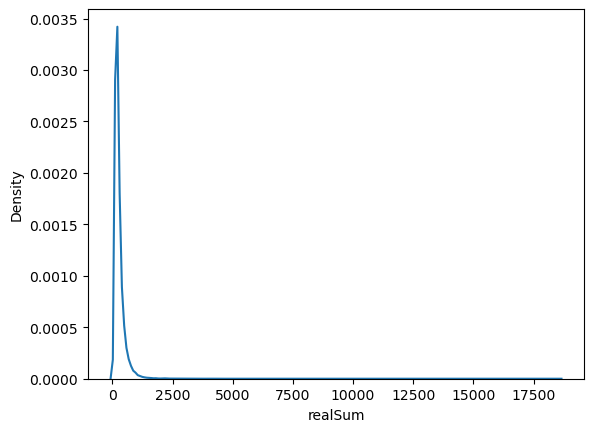

In [154]:
sns.kdeplot(df_combined['realSum'])
plt.show()

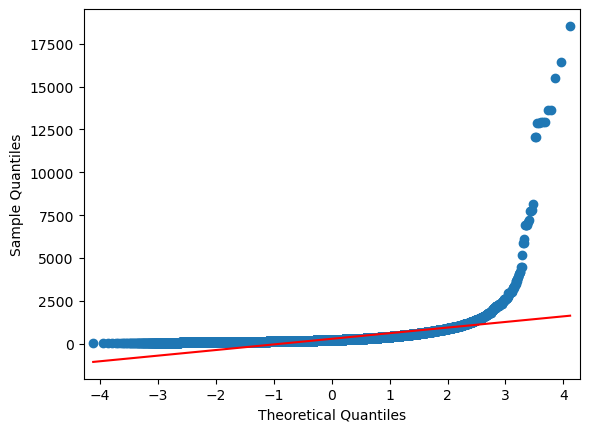

In [155]:
# EDA: Bivariate Analysis. Generating a Q-Q plot for 'realSum' to check if its distribution follows a normal distribution
sm.qqplot(df_combined['realSum'], line='s');
plt.show()

In [156]:
# Conclusions:
# The points deviate significantly from the red line, especially in the tails. The upper tail (right side) shows a steep upward trend, indicating heavy tails or outliers.
# This could mean 'realSum' has skewness or a heavy-tailed distribution, so it is probably not a normal distribution.

In [157]:
# Identifying outliers
# In order to identify outliers, we use the statistical method IQR Method (Tukey's method) if our data does not follow a normal distribution. If it does, we use the Standard Deviation Method.
# In our case, we will use Tukey's method.

In [158]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [159]:
data_series = df_combined['realSum']
outliers, lower_bound, upper_bound = tukeys_test_outliers(data_series)
print(outliers)

7        2771.307384
8        1001.804420
10        909.474375
12        675.602840
21        933.845757
            ...     
51698     727.391721
51699     718.275951
51701     750.765491
51702     715.938574
51704     637.168969
Name: realSum, Length: 3662, dtype: float64


In [160]:
# Remove outliers
df_no_outliers = df_combined[(df_combined['realSum'] >= lower_bound) & (df_combined['realSum'] <= upper_bound)]

In [161]:
df_no_outliers.head(5)

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  day_type  \
0         4.166708   98.253896         6.846473  4.90569  52.41772  weekdays   
1        33.421209  837.280757        58.342928  4.90005  52.37432  weekdays   
2         3.985908   95.386955         6.646700  4.97512  52.36103  weekdays   
3        26.119108  875.033098        60.973565  4.89417  52.37663  weekdays   
4        29.272733  815.305740        56.811677  4.90051  52.37508  weekdays   

        city  
0  Amsterdam  
1  Amsterdam  
2  Amsterdam  
3  Amsterdam  
4  Amsterdam  

[5 rows x 21 columns]

In [162]:
# Drop columns with a correlation less than 0.05 to the target variable, realSum.

# Select columns with correlation >= 0.05
selected_cols_under_005 = corr_values[corr_values >= 0.05].index

# Drop columns with correlation < 0.05
df_filtered_no_low_correlations_to_target = df_no_outliers[selected_cols_under_005]

df_filtered_no_low_correlations_to_target

realSum  attr_index_norm  bedrooms       lat  person_capacity  \
0      194.033698         4.166708         1  52.41772              2.0   
1      344.245776        33.421209         1  52.37432              4.0   
2      264.101422         3.985908         1  52.36103              2.0   
3      433.529398        26.119108         2  52.37663              4.0   
4      485.552926        29.272733         1  52.37508              2.0   
...           ...              ...       ...       ...              ...   
51697  463.501858        12.658020         2  48.20176              5.0   
51700  115.933899         7.859670         1  48.19325              4.0   
51703  304.793960        14.678608         1  48.20296              2.0   
51705  301.054157         7.822803         1  48.19200              2.0   
51706  133.230489        10.774264         1  48.20811              4.0   

       attr_index       lng  room_private  rest_index_norm  rest_index  \
0       78.690379   4.90569             1         6.846473   98.253896   
1      631.176378   4.90005             1        58.342928  837.280757   
2       75.275877   4.97512             1         6.646700   95.386955   
3      493.272534   4.89417             1        60.973565  875.033098   
4      552.830324   4.90051             1        56.811677  815.305740   
...           ...       ...           ...              ...         ...   
51697  176.754900  16.38297             0         6.850308  283.426459   
51700  109.751387  16.33970             1         5.039797  208.517887   
51703  204.970121  16.38070             0         8.270427  342.182813   
51705  109.236574  16.34100             1         3.832416  158.563398   
51706  150.450381  16.39066             1         5.444140  225.247293   

       metro_dist  multi  
0        2.539380      1  
1        0.239404      0  
2        3.651621      0  
3        0.439876      0  
4        0.318693      0  
...           ...    ...  
51697    0.285141      1  
51700    0.308192      1  
51703    0.100839      0  
51705    0.287435      0  
51706    0.480903      1  

[48045 rows x 12 columns]

<Axes: xlabel='room_type', ylabel='realSum'>

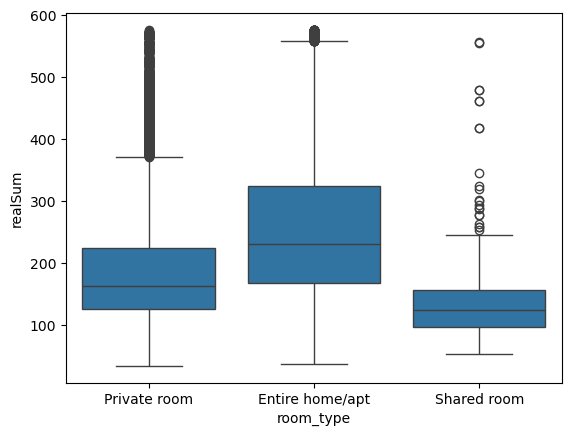

In [163]:
# Box plot for numerical and categorical variable
sns.boxplot(x='room_type', y='realSum', data=df_no_outliers)

<Axes: xlabel='realSum', ylabel='city'>

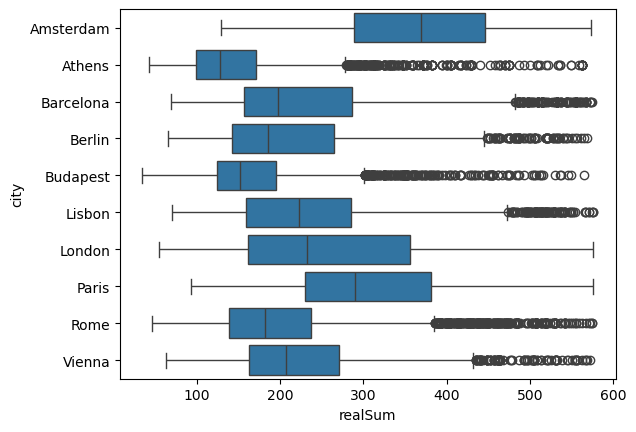

In [164]:
# Box plot for numerical and categorical variable
sns.boxplot(x='realSum', y='city', data=df_no_outliers)

<Axes: xlabel='day_type', ylabel='realSum'>

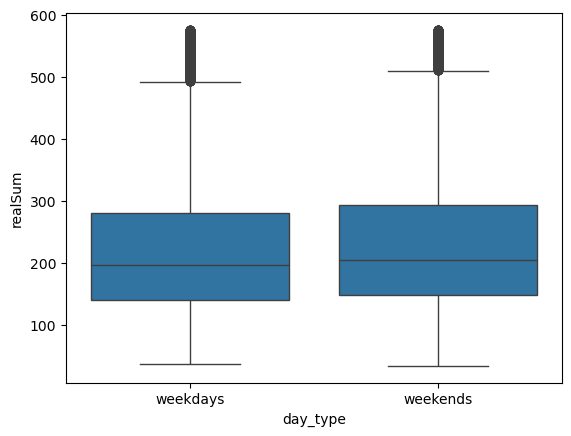

In [165]:
# Box plot for numerical and categorical variable
sns.boxplot(x='day_type', y='realSum', data=df_no_outliers)

In [166]:
sorted_realsum_df_combined = df_combined.sort_values(by="realSum", ascending=False)

In [167]:
sorted_realsum_df_combined["realSum"]

3590     18545.450285
34803    16445.614689
24348    15499.894165
48380    13664.305916
50787    13656.358834
             ...     
5316        42.884259
15917       40.184236
13954       39.009259
13884       37.129295
15563       34.779339
Name: realSum, Length: 51707, dtype: float64

In [168]:
sorted_realsum_df_combined.head(5)

realSum        room_type  room_shared  room_private  \
3590   18545.450285  Entire home/apt            0             0   
34803  16445.614689  Entire home/apt            0             0   
24348  15499.894165  Entire home/apt            0             0   
48380  13664.305916     Private room            0             1   
50787  13656.358834     Private room            0             1   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
3590               2.0                  1      0    1                10.0   
34803              2.0                  0      0    0                 9.0   
24348              3.0                  1      0    1                10.0   
48380              2.0                  0      0    0                 9.0   
50787              2.0                  0      0    0                 9.0   

       guest_satisfaction_overall  ...      dist  metro_dist   attr_index  \
3590                        100.0  ...  1.196536    0.381128   134.904353   
34803                       100.0  ...  4.602378    0.118665   260.896109   
24348                        95.0  ...  0.269101    0.227193  1100.391676   
48380                        87.0  ...  2.239501    0.414395   128.349070   
50787                        87.0  ...  2.239486    0.414409   128.349821   

       attr_index_norm   rest_index  rest_index_norm       lng       lat  \
3590          5.086455   275.573716        20.691752  23.73200  37.98600   
34803        12.700335   545.826245        32.072497   2.29772  48.83669   
24348        76.489446  2358.358493        42.228377  -0.13038  51.50995   
48380         9.191812   201.545043         4.818080  16.34356  48.20751   
50787         9.191567   201.546533         4.871302  16.34356  48.20751   

       day_type    city  
3590   weekdays  Athens  
34803  weekdays   Paris  
24348  weekdays  London  
48380  weekdays  Vienna  
50787  weekends  Vienna  

[5 rows x 21 columns]

In [169]:
sorted_realsum_df_no_outliers = df_no_outliers.sort_values(by="realSum", ascending=False)

In [170]:
sorted_realsum_df_no_outliers["realSum"]

36667    576.008948
33480    576.008948
27750    575.977798
27597    575.977798
23762    575.977798
            ...    
3994      42.884259
15917     40.184236
13954     39.009259
13884     37.129295
15563     34.779339
Name: realSum, Length: 48045, dtype: float64

In [171]:
df_no_outliers.describe()

realSum   room_shared  room_private  person_capacity  \
count  48045.000000  48045.000000   48045.00000     48045.000000   
mean     228.980509      0.007576       0.38183         3.080508   
std      112.045344      0.086712       0.48584         1.257321   
min       34.779339      0.000000       0.00000         2.000000   
25%      144.483670      0.000000       0.00000         2.000000   
50%      201.529002      0.000000       0.00000         3.000000   
75%      287.992495      0.000000       1.00000         4.000000   
max      576.008948      1.000000       1.00000         6.000000   

       host_is_superhost         multi           biz  cleanliness_rating  \
count       48045.000000  48045.000000  48045.000000        48045.000000   
mean            0.261338      0.297180      0.344594            9.392195   
std             0.439368      0.457021      0.475241            0.949289   
min             0.000000      0.000000      0.000000            2.000000   
25%             0.000000      0.000000      0.000000            9.000000   
50%             0.000000      0.000000      0.000000           10.000000   
75%             1.000000      1.000000      1.000000           10.000000   
max             1.000000      1.000000      1.000000           10.000000   

       guest_satisfaction_overall      bedrooms          dist    metro_dist  \
count                48045.000000  48045.000000  48045.000000  48045.000000   
mean                    92.623998      1.114268      3.220743      0.694782   
std                      8.846102      0.589233      2.419218      0.875992   
min                     20.000000      0.000000      0.034661      0.002301   
25%                     90.000000      1.000000      1.466737      0.252976   
50%                     95.000000      1.000000      2.633319      0.419622   
75%                     98.000000      1.000000      4.298471      0.751382   
max                    100.000000     10.000000     25.284557     14.273577   

         attr_index  attr_index_norm    rest_index  rest_index_norm  \
count  48045.000000     48045.000000  48045.000000     48045.000000   
mean     284.500524        12.645012    612.677575        22.177030   
std      220.682319         8.946050    495.012071        17.474249   
min       15.152201         0.926301     19.576924         0.592757   
25%      131.561600         6.108598    240.941700         8.399890   
50%      225.172721        10.944695    505.584280        17.144208   
75%      369.914228        16.459358    815.825639        32.057789   
max     4513.563486       100.000000   6696.156772       100.000000   

                lng           lat  
count  48045.000000  48045.000000  
mean       7.775791     45.363121  
std       10.001482      5.233822  
min       -9.226340     37.953000  
25%       -0.067010     41.385580  
50%       12.410750     47.497010  
75%       16.333600     51.439000  
max       23.786020     52.641410

In [172]:
# Calculate median price
median_price = df_no_outliers['realSum'].median()
median_price

201.5290019404765

In [173]:
# Calculate interquartile range (IQR)
Q1 = df_no_outliers['realSum'].quantile(0.25)
Q3 = df_no_outliers['realSum'].quantile(0.75)
IQR = Q3 - Q1

In [174]:
IQR

143.50882570491135

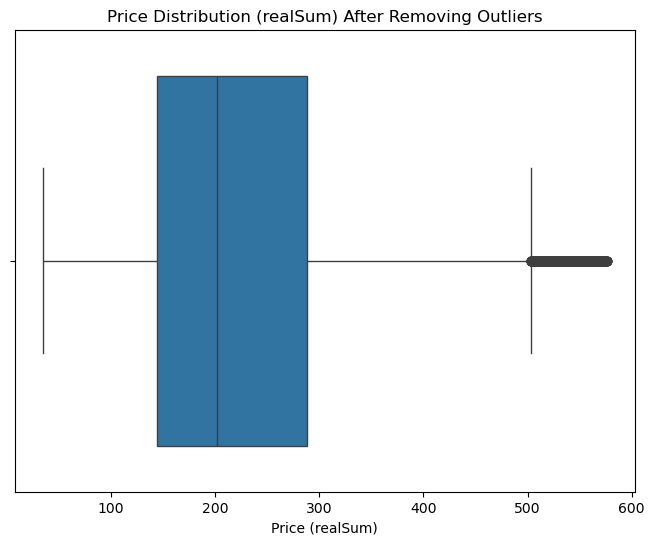

In [175]:
# Create a box plot for 'realSum'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_no_outliers['realSum'])

plt.title("Price Distribution (realSum) After Removing Outliers")
plt.xlabel("Price (realSum)")

plt.show()

In [176]:
# Conclusions:
# Median and mean price (realSum): Median price is 201.53. Comparing this with the mean (228.98), we see that the mean is slightly higher, possibly due to high-priced listings skewing the average.
# A large IQR (143.51) indicates high variability—prices fluctuate significantly across accommodations.
# The median (201.53) is close to the center of the IQR, suggesting a relatively balanced distribution within this range.

<Axes: xlabel='realSum', ylabel='Count'>

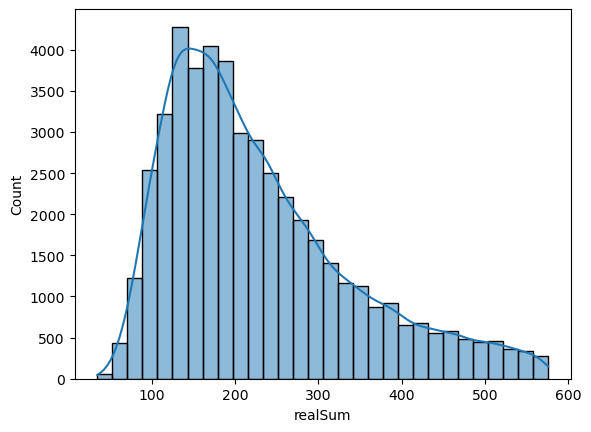

In [177]:
# For continuous variables: Histogram
sns.histplot(df_no_outliers['realSum'], bins=30, kde=True)

In [178]:
# Run a normality test, such as the Shapiro-Wilk test or Kolmogorov-Smirnov test.
# Transform the data (log transformation or Box-Cox) to see if normality can be achieved.
# NOT DONE

In [179]:
# Segment by Category: Are different property types (private rooms, shared rooms) affecting pricing trends?
# Further Analysis: Check if prices vary by location or guest satisfaction ratings.

# NOT DONE

In [180]:
# EDA: Transforming variables with custom binning 
# Define bin edges and labels
bins = [0, 150, 300, float('inf')]
labels = ['Economy', 'Premium', 'Luxury']

In [181]:
# Apply binning to 'realSum'
df_no_outliers['price_category'] = pd.cut(df_no_outliers['realSum'], bins=bins, labels=labels, right=True)

C:\Users\aican\AppData\Local\Temp\ipykernel_35556\2638747619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['price_category'] = pd.cut(df_no_outliers['realSum'], bins=bins, labels=labels, right=True)


In [182]:
# Display counts for each category
print(df_no_outliers['price_category'].value_counts())

price_category
Premium    24033
Economy    13221
Luxury     10791
Name: count, dtype: int64


In [183]:
df_no_outliers.head(5)

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...  metro_dist  attr_index  attr_index_norm  \
0                        93.0  ...    2.539380   78.690379         4.166708   
1                        85.0  ...    0.239404  631.176378        33.421209   
2                        87.0  ...    3.651621   75.275877         3.985908   
3                        90.0  ...    0.439876  493.272534        26.119108   
4                        98.0  ...    0.318693  552.830324        29.272733   

   rest_index  rest_index_norm      lng       lat  day_type       city  \
0   98.253896         6.846473  4.90569  52.41772  weekdays  Amsterdam   
1  837.280757        58.342928  4.90005  52.37432  weekdays  Amsterdam   
2   95.386955         6.646700  4.97512  52.36103  weekdays  Amsterdam   
3  875.033098        60.973565  4.89417  52.37663  weekdays  Amsterdam   
4  815.305740        56.811677  4.90051  52.37508  weekdays  Amsterdam   

  price_category  
0        Premium  
1         Luxury  
2        Premium  
3         Luxury  
4         Luxury  

[5 rows x 22 columns]

<Axes: xlabel='price_category', ylabel='count'>

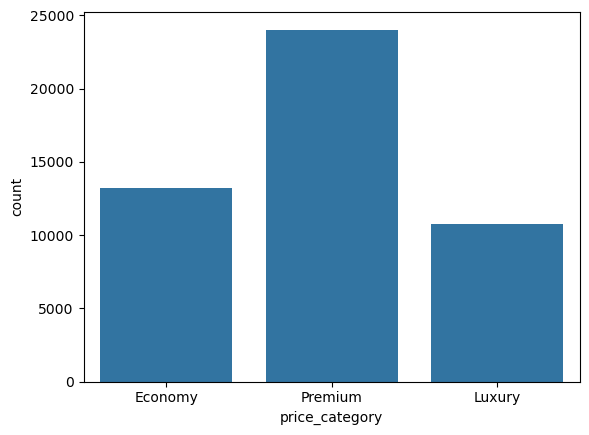

In [184]:
# Bar chart
sns.countplot(x='price_category', data=df_no_outliers)

In [185]:
# Calculating the Pearson correlation coefficient between numerical columns
correlation = df_no_outliers['realSum'].corr(df_no_outliers['dist'])
correlation

-0.05971315980438795

In [186]:
# For the correlation heatmap, do before one hot enconding (get dummies ) for city and room_type.
# Convert day_type to boolean.
# Maybe filter df by city to see better correlations before matrix?????
# NOT DONE

In [187]:
# Convert categorical values into numerical values. First, we convert day_type into boolean parameters.
# Rename column
df_combined.rename(columns={'day_type': 'weekends'}, inplace=True)

In [188]:
# Replace values
df_combined['weekends'] = df_combined['weekends'].replace({'weekends': 1, 'weekdays': 0})

C:\Users\aican\AppData\Local\Temp\ipykernel_35556\193085623.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined['weekends'] = df_combined['weekends'].replace({'weekends': 1, 'weekdays': 0})


In [189]:
df_combined.head(5)

realSum     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1              2.0   
1  344.245776  Private room            0             1              4.0   
2  264.101422  Private room            0             1              2.0   
3  433.529398  Private room            0             1              4.0   
4  485.552926  Private room            0             1              2.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                10.0   
1                  0      0    0                 8.0   
2                  0      0    1                 9.0   
3                  0      0    1                 9.0   
4                  1      0    0                10.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        93.0  ...  5.022964    2.539380   78.690379   
1                        85.0  ...  0.488389    0.239404  631.176378   
2                        87.0  ...  5.748312    3.651621   75.275877   
3                        90.0  ...  0.384862    0.439876  493.272534   
4                        98.0  ...  0.544738    0.318693  552.830324   

   attr_index_norm  rest_index  rest_index_norm      lng       lat  weekends  \
0         4.166708   98.253896         6.846473  4.90569  52.41772         0   
1        33.421209  837.280757        58.342928  4.90005  52.37432         0   
2         3.985908   95.386955         6.646700  4.97512  52.36103         0   
3        26.119108  875.033098        60.973565  4.89417  52.37663         0   
4        29.272733  815.305740        56.811677  4.90051  52.37508         0   

        city  
0  Amsterdam  
1  Amsterdam  
2  Amsterdam  
3  Amsterdam  
4  Amsterdam  

[5 rows x 21 columns]

In [190]:
# Use get_dummies function to perform one-hot encoding (convert categorical variables into multiple binary columns).
df_combined_dummies = pd.get_dummies(df_combined[["room_type", "city"]])

In [191]:
df_combined_dummies

room_type_Entire home/apt  room_type_Private room  \
0                          False                    True   
1                          False                    True   
2                          False                    True   
3                          False                    True   
4                          False                    True   
...                          ...                     ...   
51702                       True                   False   
51703                       True                   False   
51704                       True                   False   
51705                      False                    True   
51706                      False                    True   

       room_type_Shared room  city_Amsterdam  city_Athens  city_Barcelona  \
0                      False            True        False           False   
1                      False            True        False           False   
2                      False            True        False           False   
3                      False            True        False           False   
4                      False            True        False           False   
...                      ...             ...          ...             ...   
51702                  False           False        False           False   
51703                  False           False        False           False   
51704                  False           False        False           False   
51705                  False           False        False           False   
51706                  False           False        False           False   

       city_Berlin  city_Budapest  city_Lisbon  city_London  city_Paris  \
0            False          False        False        False       False   
1            False          False        False        False       False   
2            False          False        False        False       False   
3            False          False        False        False       False   
4            False          False        False        False       False   
...            ...            ...          ...          ...         ...   
51702        False          False        False        False       False   
51703        False          False        False        False       False   
51704        False          False        False        False       False   
51705        False          False        False        False       False   
51706        False          False        False        False       False   

       city_Rome  city_Vienna  
0          False        False  
1          False        False  
2          False        False  
3          False        False  
4          False        False  
...          ...          ...  
51702      False         True  
51703      False         True  
51704      False         True  
51705      False         True  
51706      False         True  

[51707 rows x 13 columns]

In [192]:
# Filter for weekdays (weekends == 0)
df_weekdays = df_no_outliers[df_no_outliers['weekends'] == 0]

# Filter for weekends (weekends == 1)
df_weekends = df_no_outliers[df_no_outliers['weekends'] == 1]

KeyError: 'weekends'

In [ ]:
df_no_outliers.shape

In [ ]:
df_weekdays.shape

In [ ]:
df_weekends.shape

In [ ]:
# Concatenate features (dfs "numeric_cols" and "df_combined_dummies")
features = pd.concat([numeric_cols, df_combined_dummies], axis=1)

In [ ]:
features

In [ ]:
target = df_combined["realSum"]

In [ ]:
target

In [ ]:
# multivariate regression analysis, chi-squared tests
# maybe use these?
# NOT DONE

In [ ]:
# Before applying any ML model here line, filter the df (df_no_outliers into df_weekdays and df_weekends).
# NOT DONE

In [ ]:
AARAG

In [ ]:
# Choice between StandardScaler and MinMaxScaler
# We will use MinMaxScaler, because it doesn't assume normality, so it works well with skewed or not normal distributions.
# It rescales values between O and 1 without changing the overall distribution pattern.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [ ]:
X_train.head()

In [ ]:
normalizer = MinMaxScaler()

In [ ]:
normalizer.fit(X_train)

In [ ]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [ ]:
X_train

In [ ]:
X_train_norm

In [ ]:
X_train.describe()

In [ ]:
# Convert NumPy array to DataFrame
X_train_norm_df = pd.DataFrame(X_train_norm)

In [ ]:
X_train.describe()

In [ ]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

In [ ]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

In [ ]:
knn = KNeighborsRegressor()

In [ ]:
knn

In [ ]:
knn.fit(X_train_norm, y_train)

In [ ]:
knn.score(X_test_norm, y_test)

In [ ]:
# Evaluate the model's performane: KNN

In [ ]:
pred = knn.predict(X_test)
pred

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_test.values

In [ ]:
accuracy = knn.score(X_test, y_test)
accuracy

In [ ]:
# Evaluate model's performance
knn.score(X_test_norm, y_test)

In [193]:
# Use Random Forest, Decision Tree and Linear Regression
# NOT DONE